# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [58]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [59]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


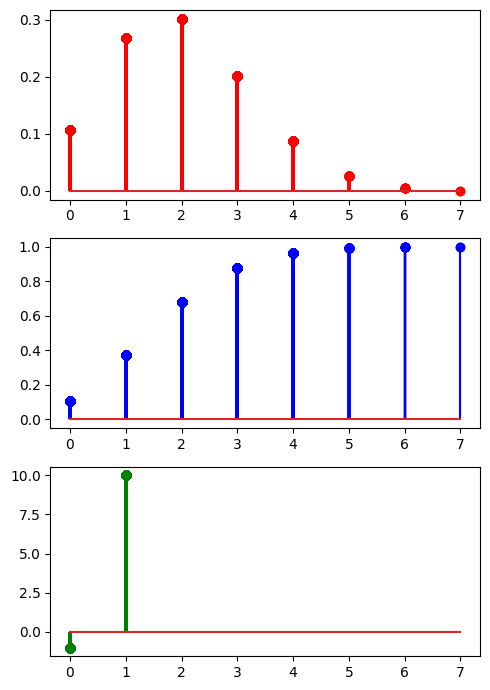

In [60]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Calcula la estimación puntual de la distribución normal.
def densidad_norm(data, mu, sigma):
    # PDF (Función de Densidad de Probabilidad) te dice la probabilidad de que un valor específico x ocurra en una distribución normal
    result = norm.pdf(data, mu, sigma)
    return result

# Calcula el acumulado de la distribución normal.
def acumulado_norm(q, mu, sigma):
    # CDF (Función de Distribución Acumulada) te da la probabilidad acumulada hasta el valor 𝑥. Es decir, te dice cuánta probabilidad hay de que un valor sea menor o igual a x
    result = norm.cdf(q, mu, sigma)
    return result

# Calcula la función cuantil a partir de la distribución normal.
def quantile_norm(p, mu, sigma):
    # La función PPF (Probability Point Function) es la inversa de la CDF. Si tienes una probabilidad acumulada p y quieres saber cuál es el valor x correspondiente en la distribución, usas norm.ppf(p)
    result = norm.ppf(p, mu, sigma)
    return result
# Genera variables aleatorias a partir de la distribución normal.
def random_norm(loc, scale, size):
    result = norm.rvs(loc, scale, size=size)
    return result

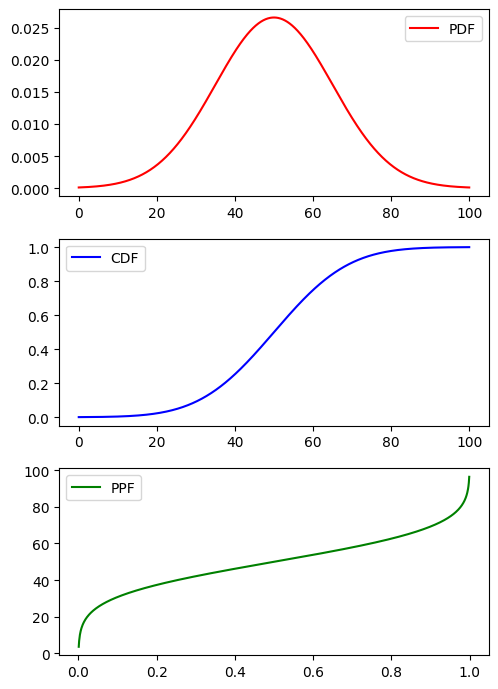

In [62]:
## DISTRIBUCIÓN NORMAL SIN GENERAR VARIABLES ALEATORIAS CON random_norm()

np.random.seed(42)


data = np.linspace(0, 100, 1000)
mu = 50
sigma = 15


pdf_result = densidad_norm(data, mu, sigma)
cdf_result = acumulado_norm(data, mu, sigma)
# debe recibir probabilidades
# norm.ppf() espera probabilidades acumuladas (valores entre 0 y 1)
# Es la función inversa de la CDF (Función de Distribución Acumulada).
# Hint: https://www.youtube.com/watch?v=VqiNfnASvHs
cumulative_prob = np.linspace(0, 1, len(data))
ppf_result = quantile_norm(cumulative_prob, mu, sigma)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].plot(data, pdf_result, "r-", label="PDF")
axis[1].plot(data, cdf_result, "b-", label="CDF")
axis[2].plot(cumulative_prob, ppf_result, "g-", label="PPF")
axis[0].legend()
axis[1].legend()
axis[2].legend()

plt.tight_layout() # Ajustar cada una de las gráficas
plt.show()

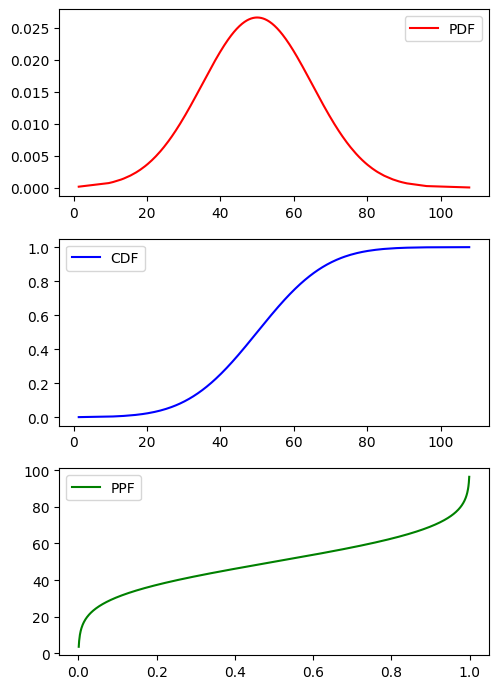

In [63]:
## DISTRIBUCIÓN NORMAL GENERANDO VARIABLES ALEATORIAS CON random_norm()
# Creando con la generación de valores 

#data = np.linspace(0, 100, 1000)
np.random.seed(42)
mu = 50
sigma = 15

data = np.sort(random_norm(mu, sigma, 1000))

pdf_result = densidad_norm(data, mu, sigma)
cdf_result = acumulado_norm(data, mu, sigma)

# debemos asegurarnos de que representa probabilidades (entre 0 y 1).
# Se puede usar la función norm.cdf para convertir data en probabilidades acumuladas antes de aplicarle norm.ppf
cumulative_prob = np.linspace(0,1, len(data))
ppf_result = quantile_norm(cumulative_prob, mu, sigma)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].plot(data, pdf_result, "r-", label="PDF")
axis[1].plot(data, cdf_result, "b-", label="CDF")
axis[2].plot(cumulative_prob, ppf_result, "g-", label="PPF")
axis[0].legend()
axis[1].legend()
axis[2].legend()

plt.tight_layout() # Ajustar cada una de las gráficas
plt.show()

In [64]:
from scipy.stats import uniform
# Calcula la estimación puntual de la distribución uniforme.
def densidad_uniform(data, loc, scale):
    result = uniform.pdf(data, loc, scale)
    return result

# Calcula el acumulado de la distribución uniforme.
def acumulado_uniform(q, loc, scale):
    result = uniform.cdf(q, loc, scale)
    return result

# Calcula la función cuantil a partir de la distribución uniforme.
def quantile_uniform(p, loc, scale):
    result = uniform.ppf(p, loc, scale)
    return result

#  Genera variables aleatorias a partir de la distribución uniforme.
def random_uniform(n, loc, scale):
    result = uniform.rvs(loc, scale, size=n)
    return result

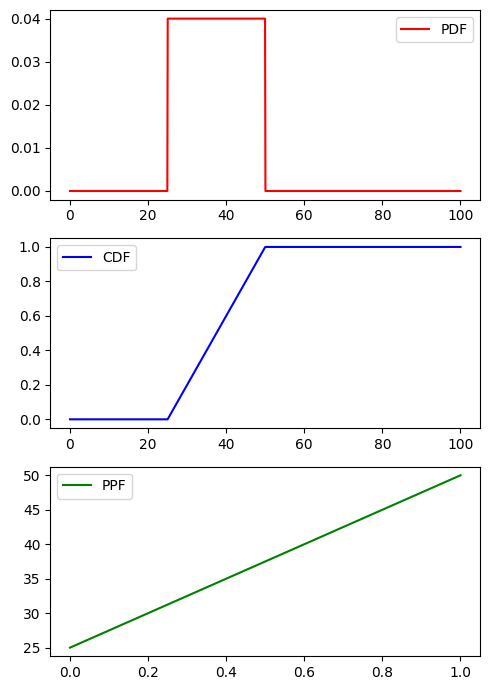

In [ ]:
## DISTRIBUCIÓN UNIFORME SIN GENERAR VARIABLES ALEATORIAS CON random_uniform()
loc = 25
scale = 50
data = np.linspace(0,100,1000)
pdf_result = densidad_uniform(data, loc, scale = scale-loc)
cdf_result = acumulado_uniform(data, loc, scale = scale-loc)
cumulative_prob = np.linspace(0, 1,len(data))
ppf_result = quantile_uniform(cumulative_prob, loc, scale = scale-loc)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].plot(data, pdf_result, "r-", label="PDF")
axis[1].plot(data, cdf_result, "b-", label="CDF")
axis[2].plot(cumulative_prob, ppf_result, "g-", label="PPF")
axis[0].legend()
axis[1].legend()
axis[2].legend()

plt.tight_layout() # Ajustar cada una de las gráficas
plt.show()


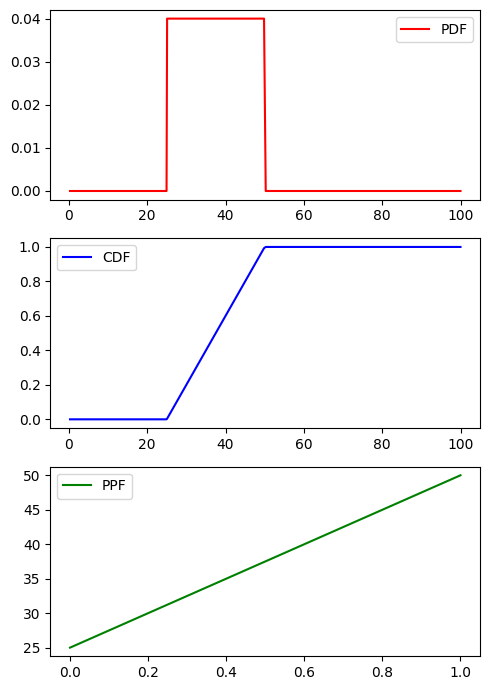

In [ ]:
## DISTRIBUCIÓN UNIFORME GENERANDO VARIABLES ALEATORIAS CON random_uniform()
# Creando con la generación de valores 
loc = 25
scale = 50
data = np.sort(random_uniform(1000, 0, scale=100))
pdf_result = densidad_uniform(data, loc, scale = scale-loc)
cdf_result = acumulado_uniform(data, loc, scale = scale-loc)
cumulative_prob = np.linspace(0, 1,len(data))
ppf_result = quantile_uniform(cumulative_prob, loc, scale = scale-loc)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].plot(data, pdf_result, "r-", label="PDF")
axis[1].plot(data, cdf_result, "b-", label="CDF")
axis[2].plot(cumulative_prob, ppf_result, "g-", label="PPF")
axis[0].legend()
axis[1].legend()
axis[2].legend()

plt.tight_layout() # Ajustar cada una de las gráficas
plt.show()
